In [4]:
#Creating a system that will enable us to detect a driver, that will analyze driving patterns using measurments from the sensor.

In [5]:
#pip install seaborn


In [6]:
#Importing Libraries
import math
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score,KFold, StratifiedKFold
%matplotlib inline

In [7]:
#load dataset
driver_data = pd.read_csv("driver_profile_data.csv")

In [9]:
#finding the Size and shape of the dataset
print("Size of the dataset is {}".format(driver_data.size))
print("The dataset contains {} rows and {} columns\n".format(driver_data.shape[0], driver_data.shape[1]))

Size of the dataset is 5096520
The dataset contains 94380 rows and 54 columns



In [10]:
#finding the attributes of the dataset
print("The attributes and their data-types are as follows:")
driver_data.info()

The attributes and their data-types are as follows:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94380 entries, 0 to 94379
Data columns (total 54 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Fuel_consumption                              94380 non-null  float64
 1   Accelerator_Pedal_value                       94380 non-null  float64
 2   Throttle_position_signal                      94380 non-null  float64
 3   Short_Term_Fuel_Trim_Bank1                    94380 non-null  float64
 4   Intake_air_pressure                           94380 non-null  int64  
 5   Filtered_Accelerator_Pedal_value              94380 non-null  int64  
 6   Absolute_throttle_position                    94380 non-null  float64
 7   Engine_soacking_time                          94380 non-null  int64  
 8   Inhibition_of_engine_fuel_cut_off             94380 non-null  int64  
 9   Engine_in

In [11]:
#EDA PART

In [12]:
#Descriptive statistics
driver_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Fuel_consumption,94380.0,757.000246,761.376214,0.0,320.0,422.40,1036.80,10931.2
Accelerator_Pedal_value,94380.0,3.718682,8.505756,0.0,0.0,0.00,0.00,99.2
Throttle_position_signal,94380.0,13.208186,16.262249,0.0,6.6,7.50,12.70,100.0
Short_Term_Fuel_Trim_Bank1,94380.0,0.122782,3.166412,-15.6,-1.6,0.00,1.60,23.4
Intake_air_pressure,94380.0,36.853433,27.957584,0.0,4.0,38.00,57.00,178.0
Filtered_Accelerator_Pedal_value,94380.0,0.000000,0.000000,0.0,0.0,0.00,0.00,0.0
Absolute_throttle_position,94380.0,19.362277,12.079046,12.5,14.5,15.30,19.20,84.3
Engine_soacking_time,94380.0,26.795327,73.072712,0.0,1.0,3.00,6.00,255.0
Inhibition_of_engine_fuel_cut_off,94380.0,0.000000,0.000000,0.0,0.0,0.00,0.00,0.0
Engine_in_fuel_cut_off,94380.0,0.067249,0.250455,0.0,0.0,0.00,0.00,1.0


In [13]:
#Finding columns with constant values and no variance
desc = driver_data.describe().T
const_cols = desc[desc['min']==desc['max']].index.to_list()
print("Columns with constant values: ", const_cols)

Columns with constant values:  ['Filtered_Accelerator_Pedal_value', 'Inhibition_of_engine_fuel_cut_off', 'Fuel_Pressure', 'Torque_scaling_factor(standardization)', 'Glow_plug_control_request']


In [14]:
# Finding the percentage of null values
driver_data.isnull().sum().sort_values(ascending = False)/driver_data.shape[0]*100


Fuel_consumption                                0.0
Clutch_operation_acknowledge                    0.0
Target_engine_speed_used_in_lock-up_module      0.0
Glow_plug_control_request                       0.0
Activation_of_Air_compressor                    0.0
Torque_converter_speed                          0.0
Current_Gear                                    0.0
Engine_coolant_temperature.1                    0.0
Wheel_velocity_front_left-hand                  0.0
Wheel_velocity_rear_right-hand                  0.0
Wheel_velocity_front_right-hand                 0.0
Wheel_velocity_rear_left-hand                   0.0
Torque_converter_turbine_speed_-_Unfiltered     0.0
Converter_clutch                                0.0
Accelerator_Pedal_value                         0.0
Gear_Selection                                  0.0
Vehicle_speed                                   0.0
Acceleration_speed_-_Longitudinal               0.0
Indication_of_brake_switch_ON/OFF               0.0
Master_cylin

In [15]:
#Get duplicate rows
driver_data[driver_data.duplicated()]

,Fuel_consumption,Accelerator_Pedal_value,Throttle_position_signal,Short_Term_Fuel_Trim_Bank1,Intake_air_pressure,Filtered_Accelerator_Pedal_value,Absolute_throttle_position,Engine_soacking_time,Inhibition_of_engine_fuel_cut_off,Engine_in_fuel_cut_off,...,Acceleration_speed_-_Longitudinal,Indication_of_brake_switch_ON/OFF,Master_cylinder_pressure,Calculated_road_gradient,Acceleration_speed_-_Lateral,Steering_wheel_speed,Steering_wheel_angle,Time(s),Class,PathOrder


In [16]:
#Visualizatiion

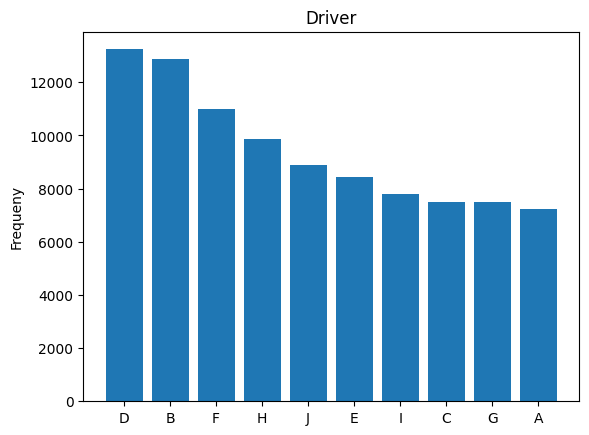

Class
D    13244
B    12864
F    11012
H     9880
J     8904
E     8436
I     7808
C     7500
G     7492
A     7240
Name: count, dtype: int64


In [17]:
#Bar plot for showing the target data
var = driver_data["Class"]
varValue = var.value_counts()
plt.bar(varValue.index,varValue)
plt.xticks(varValue.index,varValue.index.values)
plt.ylabel("Frequeny")
plt.title('Driver')
plt.show()
print("{}".format(varValue))

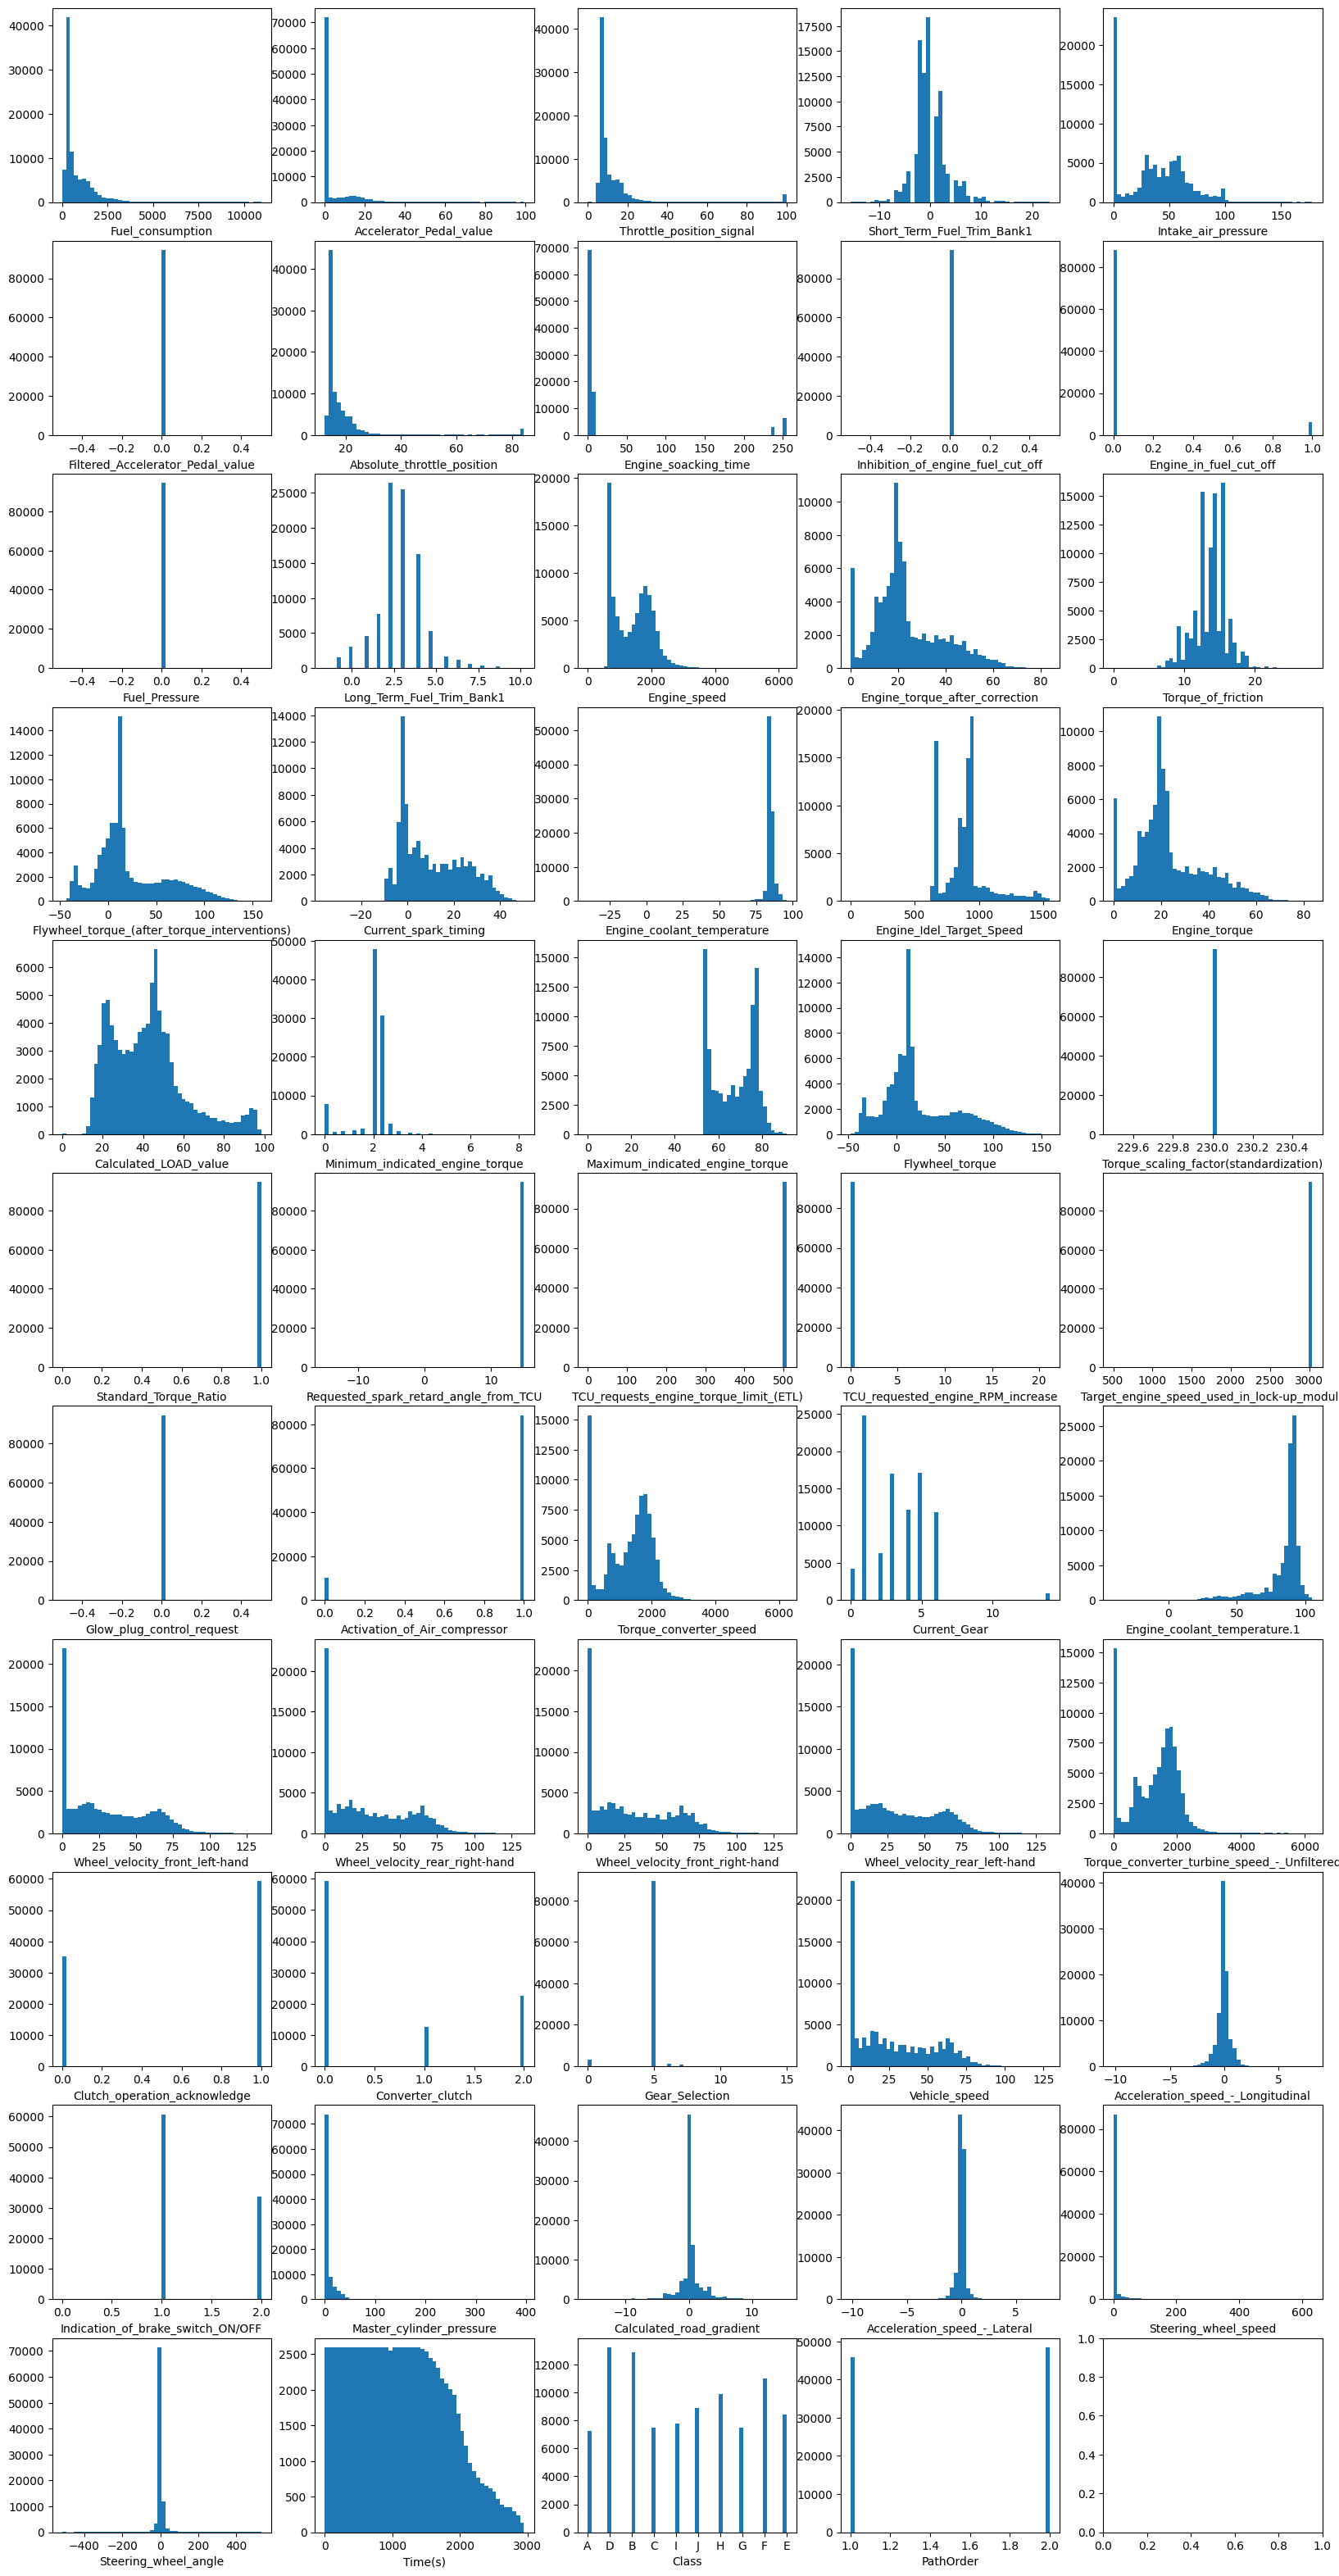

In [18]:
fig, axes = plt.subplots(11,5, figsize=(20,40))
count=0
x,y=0,0
for col in driver_data.columns:
    axes[x][y].hist(driver_data[col], bins=50)
    axes[x][y].set_xlabel(col)
    count+=1
    x=math.floor(count/5)
    y=count%5
plt.show()
#histogram

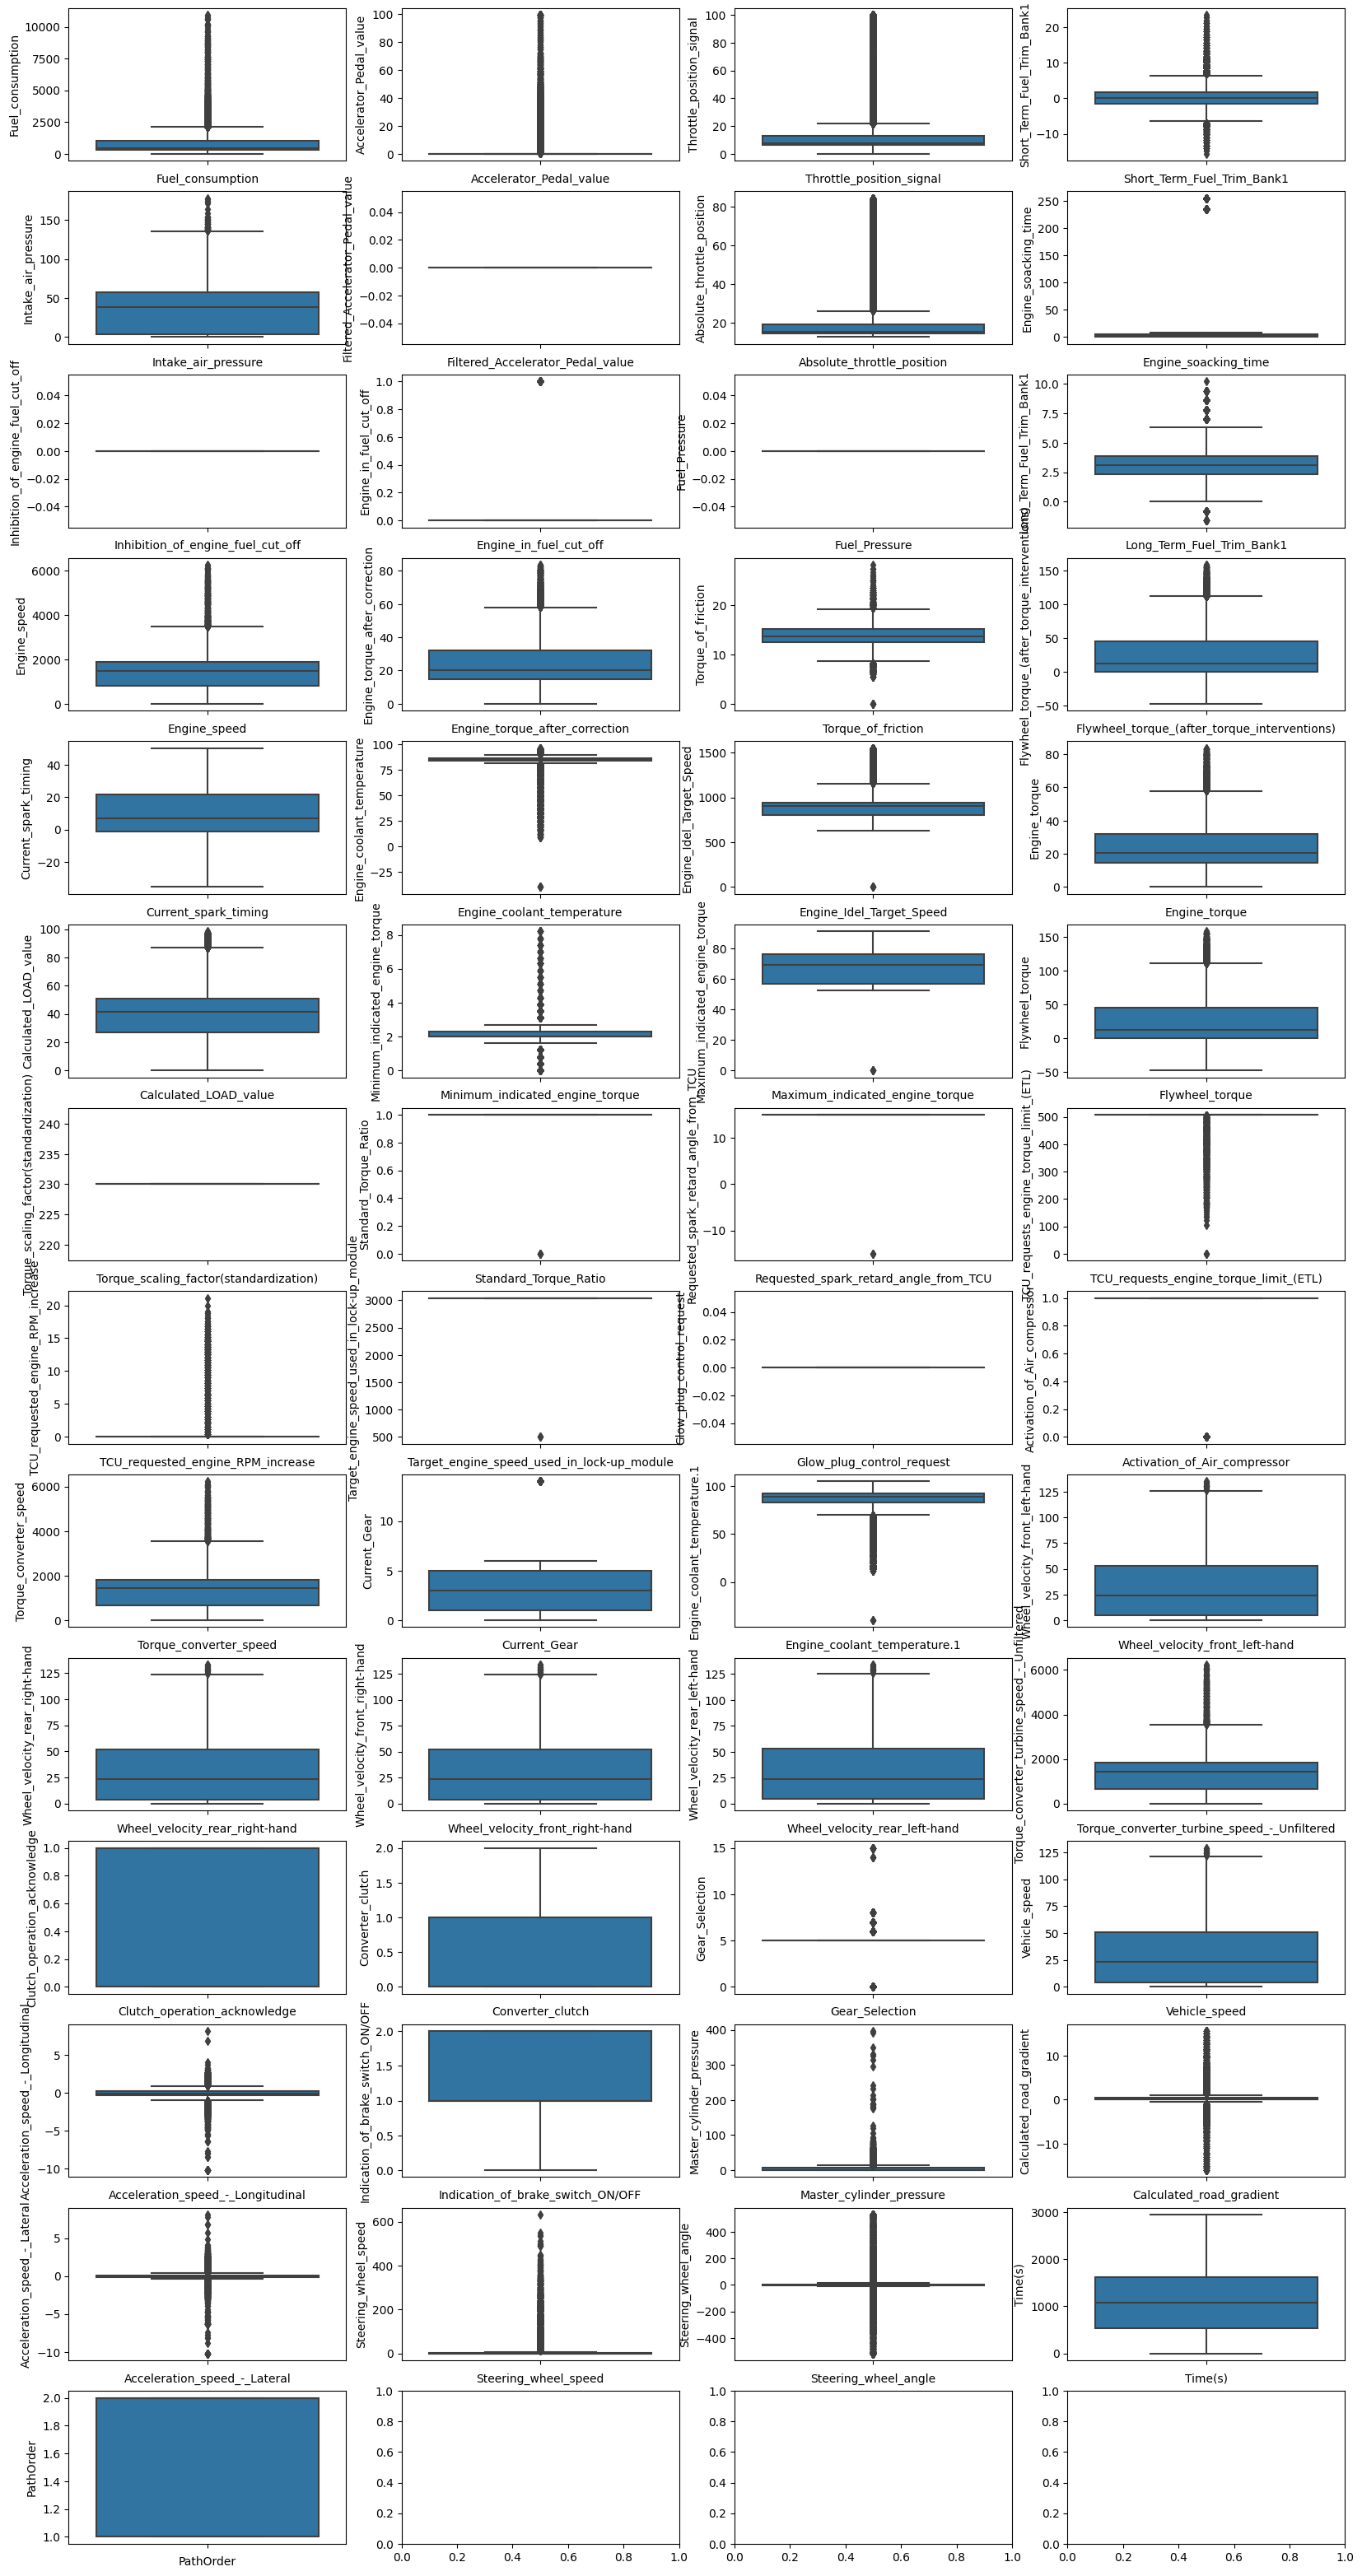

In [19]:
#boxplots
fig, axes = plt.subplots(14,4, figsize=(20,40))
count=0
a,b=0,0
for col in driver_data.drop('Class', axis=1).columns:
    sns.boxplot(data=driver_data, y=col, ax=axes[a, b])
    axes[a][b].set_xlabel(col)
    count+=1
    a=math.floor(count/4)
    b=count%4
plt.show()

In [20]:
#data preparation

In [21]:
#separating features and target variable to perform feature selection
features = driver_data.drop(['Class'],axis=1)
target = driver_data[["Class"]]

In [22]:
#cleaning dataset

In [23]:
# Removing insignificant columns
features.drop(const_cols, axis=1, inplace=True)

In [24]:
#no missing values
#no duplicate values

In [25]:
#outlier removal
features.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.95])

,Fuel_consumption,Accelerator_Pedal_value,Throttle_position_signal,Short_Term_Fuel_Trim_Bank1,Intake_air_pressure,Absolute_throttle_position,Engine_soacking_time,Engine_in_fuel_cut_off,Long_Term_Fuel_Trim_Bank1,Engine_speed,...,Vehicle_speed,Acceleration_speed_-_Longitudinal,Indication_of_brake_switch_ON/OFF,Master_cylinder_pressure,Calculated_road_gradient,Acceleration_speed_-_Lateral,Steering_wheel_speed,Steering_wheel_angle,Time(s),PathOrder
count,94380.000000,94380.000000,94380.000000,94380.000000,94380.000000,94380.000000,94380.000000,94380.000000,94380.000000,94380.000000,...,94380.000000,94380.000000,94380.000000,94380.000000,94380.000000,94380.000000,94380.000000,94380.000000,94380.000000,94380.000000
mean,757.000246,3.718682,13.208186,0.122782,36.853433,19.362277,26.795327,0.067249,2.843127,1422.838885,...,28.518881,-0.076198,1.356294,5.686715,0.300419,-0.007616,6.362407,0.773593,1110.031765,1.513583
std,761.376214,8.505756,16.262249,3.166412,27.957584,12.079046,73.072712,0.250455,1.362755,613.428059,...,25.309664,0.593006,0.479017,9.904240,2.210411,0.417956,26.467043,60.815388,683.042550,0.499818
min,0.000000,0.000000,0.000000,-15.600000,0.000000,12.500000,0.000000,0.000000,-1.600000,0.000000,...,0.000000,-10.200000,0.000000,0.000000,-16.000000,-10.200000,0.000000,-516.800000,1.000000,1.000000
1%,0.000000,0.000000,5.200000,-7.000000,0.000000,13.300000,0.000000,0.000000,-0.800000,630.000000,...,0.000000,-1.900000,1.000000,0.900000,-6.000000,-1.200000,0.000000,-216.900000,22.000000,1.000000
5%,38.400000,0.000000,6.100000,-4.700000,0.000000,14.100000,0.000000,0.000000,0.800000,666.000000,...,0.000000,-1.100000,1.000000,0.900000,-2.500000,-0.600000,0.000000,-23.500000,108.000000,1.000000
10%,256.000000,0.000000,6.100000,-3.100000,0.000000,14.100000,0.000000,0.000000,1.600000,668.000000,...,0.000000,-0.700000,1.000000,1.000000,-1.000000,-0.400000,0.000000,-10.400000,215.000000,1.000000
25%,320.000000,0.000000,6.600000,-1.600000,4.000000,14.500000,1.000000,0.000000,2.300000,823.000000,...,4.000000,-0.300000,1.000000,1.000000,0.000000,-0.100000,0.000000,-2.600000,537.000000,1.000000
50%,422.400000,0.000000,7.500000,0.000000,38.000000,15.300000,3.000000,0.000000,3.100000,1473.000000,...,23.000000,-0.100000,1.000000,1.100000,0.000000,0.000000,0.000000,0.800000,1073.000000,2.000000
75%,1036.800000,0.000000,12.700000,1.600000,57.000000,19.200000,6.000000,0.000000,3.900000,1878.000000,...,51.000000,0.200000,2.000000,5.900000,0.500000,0.100000,4.000000,4.000000,1616.000000,2.000000


In [26]:
#capping and flooring of outliers
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.05))
    x=x.clip(upper=x.quantile(0.95))
    return(x)



In [27]:
features = features.apply(lambda x: outlier_cap(x))

In [28]:
features.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.95])

,Fuel_consumption,Accelerator_Pedal_value,Throttle_position_signal,Short_Term_Fuel_Trim_Bank1,Intake_air_pressure,Absolute_throttle_position,Engine_soacking_time,Engine_in_fuel_cut_off,Long_Term_Fuel_Trim_Bank1,Engine_speed,...,Vehicle_speed,Acceleration_speed_-_Longitudinal,Indication_of_brake_switch_ON/OFF,Master_cylinder_pressure,Calculated_road_gradient,Acceleration_speed_-_Lateral,Steering_wheel_speed,Steering_wheel_angle,Time(s),PathOrder
count,94380.000000,94380.000000,94380.000000,94380.000000,94380.000000,94380.000000,94380.000000,94380.000000,94380.000000,94380.000000,...,94380.000000,94380.000000,94380.000000,94380.000000,94380.000000,94380.000000,94380.000000,94380.000000,94380.000000,94380.000000
mean,715.645450,3.223991,11.160111,0.046364,36.299248,17.848181,26.795327,0.067249,2.824638,1403.425111,...,28.115989,-0.067263,1.356347,5.190381,0.286491,-0.009596,3.088663,0.687483,1100.297139,1.513583
std,597.079276,6.425510,7.320157,2.576941,26.782536,5.470623,73.072712,0.250455,1.077596,561.074721,...,24.485019,0.464590,0.478922,7.588898,1.350411,0.249634,7.040331,9.820066,653.174511,0.499818
min,38.400000,0.000000,6.100000,-4.700000,0.000000,14.100000,0.000000,0.000000,0.800000,666.000000,...,0.000000,-1.100000,1.000000,0.900000,-2.500000,-0.600000,0.000000,-23.500000,108.000000,1.000000
1%,38.400000,0.000000,6.100000,-4.700000,0.000000,14.100000,0.000000,0.000000,0.800000,666.000000,...,0.000000,-1.100000,1.000000,0.900000,-2.500000,-0.600000,0.000000,-23.500000,108.000000,1.000000
5%,38.400000,0.000000,6.100000,-4.700000,0.000000,14.100000,0.000000,0.000000,0.800000,666.000000,...,0.000000,-1.100000,1.000000,0.900000,-2.500000,-0.600000,0.000000,-23.500000,108.000000,1.000000
10%,256.000000,0.000000,6.100000,-3.100000,0.000000,14.100000,0.000000,0.000000,1.600000,668.000000,...,0.000000,-0.700000,1.000000,1.000000,-1.000000,-0.400000,0.000000,-10.400000,215.000000,1.000000
25%,320.000000,0.000000,6.600000,-1.600000,4.000000,14.500000,1.000000,0.000000,2.300000,823.000000,...,4.000000,-0.300000,1.000000,1.000000,0.000000,-0.100000,0.000000,-2.600000,537.000000,1.000000
50%,422.400000,0.000000,7.500000,0.000000,38.000000,15.300000,3.000000,0.000000,3.100000,1473.000000,...,23.000000,-0.100000,1.000000,1.100000,0.000000,0.000000,0.000000,0.800000,1073.000000,2.000000
75%,1036.800000,0.000000,12.700000,1.600000,57.000000,19.200000,6.000000,0.000000,3.900000,1878.000000,...,51.000000,0.200000,2.000000,5.900000,0.500000,0.100000,4.000000,4.000000,1616.000000,2.000000


In [29]:
#feature encoding
#there are no categorical features

In [30]:
#encoding target variables
#Label encoding
le = preprocessing.LabelEncoder()
Y = le.fit_transform(target["Class"])

In [31]:
#Feature Selection
#We removed identical and extraneous features. For instance, Engine torque value is identical to correction of Engine torque value. After deleting redundant features, we performed feature selection to exclude highly correlated features for improving the performance in terms of the accuracy and speed. We selected 15 features from 51 features.

In [32]:
#Mutual information between features and target values are calculated
importances = mutual_info_classif(features, target['Class'].to_numpy())

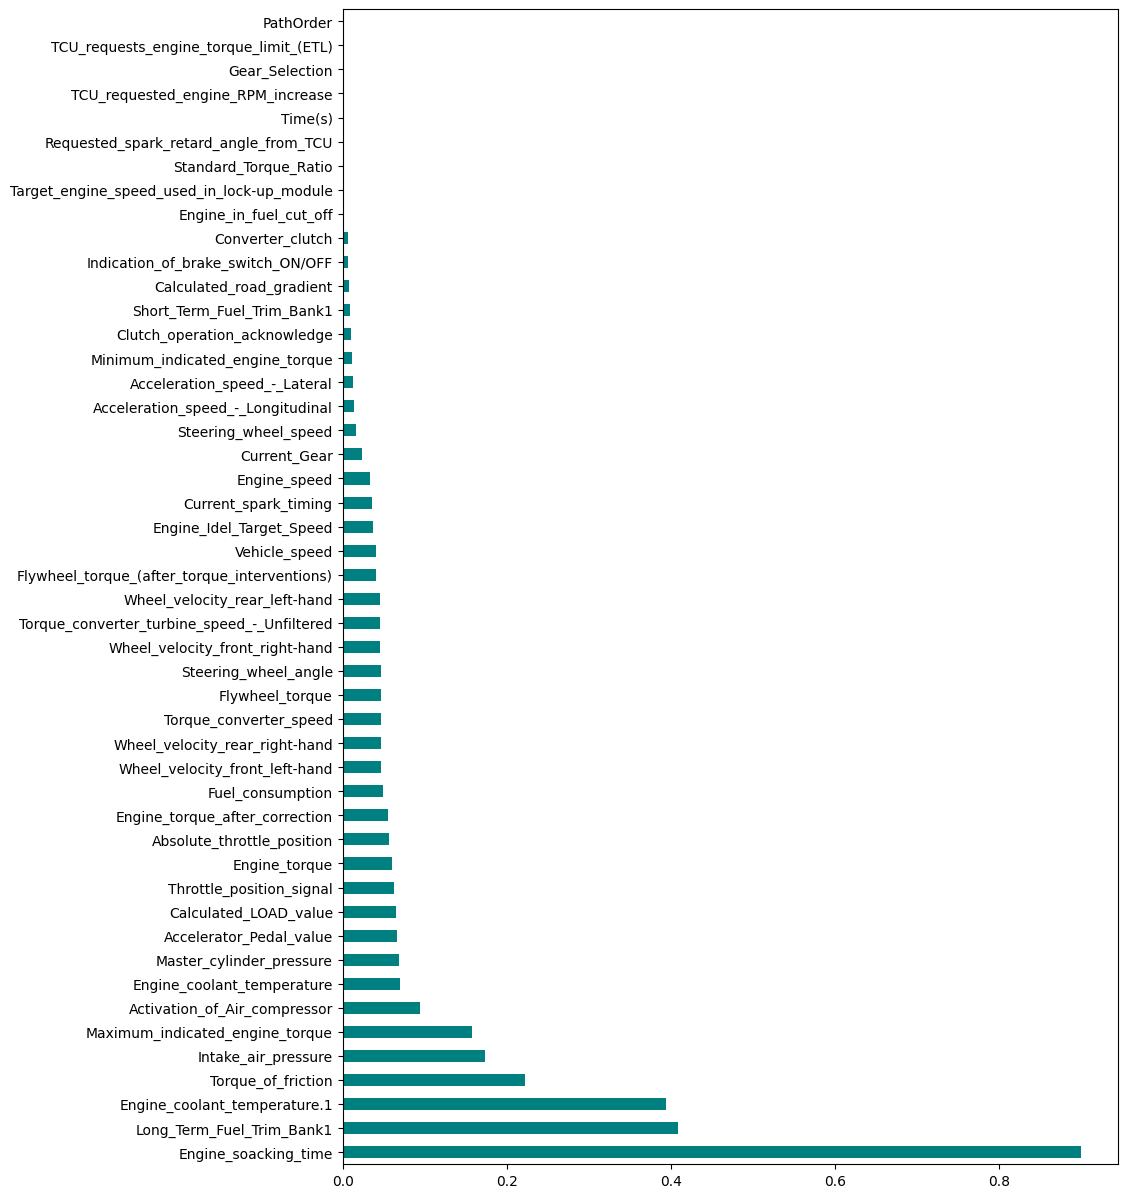

In [33]:
#Plotting mutual information values
feat_importances = pd.Series(importances, features.columns)
feat_importances.sort_values(ascending=False, inplace=True)
feat_importances.plot(kind='barh',color='teal',figsize=(10,15))
plt.show()

In [34]:
#Selecting the best 15 fatures
X = features[feat_importances.index[:15]]

In [35]:
#Split the main data into training set and testing set

In [36]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=0)


In [37]:
print("Shape of Training Data", X_train.shape)
print("Shape of Testing Data", X_test.shape)
print("Response Rate in Training Data", y_train.mean())
print("Response Rate in Testing Data", y_test.mean())

Shape of Training Data (75504, 15)
Shape of Testing Data (18876, 15)
Response Rate in Training Data 4.382787666878576
Response Rate in Testing Data 4.354418308963764


In [38]:
#data normalization

In [39]:
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
X_train = mmc.fit_transform(X_train)
X_test = mmc.transform(X_test)

In [40]:
#training model

#decision tree
# Building a Decision Tree Model
dtree=DecisionTreeClassifier(criterion='gini',random_state=101)

In [41]:
#hyperparameter tuning
param_dist = {'max_depth': [3, 5, 6, 7, 8, 9, 10, 11, 12], 
              'min_samples_split': [5,10,20,30,50, 100, 150, 200, 250] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 12, 'min_samples_split': 5}


In [42]:
#model training with best parameters

In [43]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=12,min_samples_split=5)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=12, min_samples_split=5, random_state=0)

In [44]:
#random forest

# Building a Random Forest Model with best parameters from Decision Tree
rf=RandomForestClassifier(criterion='gini',random_state=101,max_depth=12,min_samples_split=5)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, min_samples_split=5, random_state=101)

In [45]:
#knn

# Building a KNN Model
knn = KNeighborsClassifier()



In [46]:
#hyperparameter tuning
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(),grid_params,verbose=1,cv=3,n_jobs=-1)
gs_res = gs.fit(X_train,y_train)
print('Best Parameters using grid search: \n', gs_res.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters using grid search: 
 {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [47]:
#model training with best parameters

knn = KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm='brute',metric='manhattan')
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='brute', metric='manhattan', weights='distance')

In [48]:
#evaluating models

# Creating the metrics
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [49]:
#decision tree

print_score(dtree,X_train, y_train, X_test, y_test, train=True)
print_score(dtree,X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 92.97%
_______________________________________________
CLASSIFICATION REPORT:
                     0             1            2             3            4  \
precision     0.998072      0.930448     0.921830      0.848084     0.994573   
recall        0.981217      0.969794     0.795470      0.918577     0.984039   
f1-score      0.989572      0.949714     0.854001      0.881924     0.989278   
support    5803.000000  10263.000000  6004.000000  10599.000000  6704.000000   

                     5            6            7            8            9  \
precision     0.994407     0.920550     0.961144     0.927023     0.856538   
recall        0.993047     0.922715     0.910271     0.811127     0.962766   
f1-score      0.993726     0.921631     0.935016     0.865211     0.906551   
support    8773.000000  5952.000000  7935.000000  6327.000000  7144.000000   

           accuracy     macro avg  weighted avg  
precision  0.929659      0.935267      0.931689  


In [50]:
#random forests
print_score(rf,X_train, y_train, X_test, y_test, train=True)
print_score(rf,X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 95.08%
_______________________________________________
CLASSIFICATION REPORT:
                     0             1            2             3            4  \
precision     0.999480      0.979091     0.955193      0.907106     0.994352   
recall        0.993279      0.971841     0.848601      0.952637     0.997912   
f1-score      0.996370      0.975452     0.898748      0.929314     0.996129   
support    5803.000000  10263.000000  6004.000000  10599.000000  6704.000000   

                     5            6            7            8            9  \
precision     0.988488     0.987453     0.923311     0.951322     0.864079   
recall        0.998290     0.925571     0.955892     0.824719     0.993981   
f1-score      0.993365     0.955511     0.939319     0.883508     0.924489   
support    8773.000000  5952.000000  7935.000000  6327.000000  7144.000000   

           accuracy     macro avg  weighted avg  
precision  0.950824      0.954987      0.952687  


In [51]:
#KNN
print_score(knn,X_train, y_train, X_test, y_test, train=True)
print_score(knn,X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0        1            2             3       4       5       6  \
precision     1.0      1.0     0.999833      1.000000     1.0     1.0     1.0   
recall        1.0      1.0     1.000000      0.999906     1.0     1.0     1.0   
f1-score      1.0      1.0     0.999917      0.999953     1.0     1.0     1.0   
support    5803.0  10263.0  6004.000000  10599.000000  6704.0  8773.0  5952.0   

                7       8       9  accuracy     macro avg  weighted avg  
precision     1.0     1.0     1.0  0.999987      0.999983      0.999987  
recall        1.0     1.0     1.0  0.999987      0.999991      0.999987  
f1-score      1.0     1.0     1.0  0.999987      0.999987      0.999987  
support    7935.0  6327.0  7144.0  0.999987  75504.000000  75504.000000  
Test Result:
Accuracy Score: 89.38%
_______________________________________________
CLASSIFICATION REPORT:
        

In [52]:
#cross validation
#We have found that random forest is the best model in terms of accuracy score as well as f1-score. Therefore, we will be testing our random forest model using the hold-out dataset

In [53]:
kf=KFold(n_splits=5, shuffle=True, random_state=42)

In [54]:
rf=RandomForestClassifier(criterion='gini',random_state=101,max_depth=12,min_samples_split=5)

In [55]:
score=cross_val_score(rf, X, Y, cv=kf)

In [56]:
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.94098326 0.94267853 0.94273151 0.94130112 0.94119517]
Average Cross Validation score :0.9417779190506463
